Step 1: Data Preparation
First, we'll load the dataset and perform basic preprocessing, including handling missing values, feature selection, and splitting the data into training and testing sets.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('C:/Users/Francis Musoke/Downloads/Synthetic_data.csv')

# Display basic information and check for missing values
print(data.describe())
print(data.isnull().sum())

# Handling missing values (drop rows with missing values for simplicity)
data.dropna(inplace=True)

# Select features and target variable
features = data[['Temperature', 'Relative.humidity', 'Precipitation', 'Ozone', 'PM_10', 'NO_2']]
target = data['Grass pollen']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Feature scaling (optional but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


       Grass pollen   Temperature  Relative.humidity  Precipitation  \
count     92.000000     92.000000          92.000000      92.000000   
mean      67.264105   1066.991395       21996.036685       6.683832   
std      113.603682   4440.223971       33972.461411      34.515017   
min        0.000000     12.983333          53.208333       0.000000   
25%        6.511219     16.537500          63.916667       0.000000   
50%       21.451017     18.045833          74.729167       0.000000   
75%       54.551414     20.515625       60375.000000       0.170833   
max      513.373210  23675.000000       93375.000000     225.000000   

       Artemisia     Betula      Taxus    Quercus  Alnus  Fraxinus  ...  \
count  92.000000  92.000000  92.000000  92.000000   92.0      92.0  ...   
mean    0.005549   5.154430   0.837224   3.202889    0.0       0.0  ...   
std     0.053221   9.933027   1.694308   5.982532    0.0       0.0  ...   
min     0.000000   0.000000   0.000000   0.000000    0.0    

Pollen Levels:
Grass Pollen:

Mean: 67.26
Standard Deviation: 113.60
Range: 0 to 513.37
Interpretation: The mean grass pollen count is relatively high, but the standard deviation is large, indicating significant variability. The maximum value (513.37) suggests that there are periods of extremely high pollen counts. Decisions can include:

Implementing targeted warnings during periods when grass pollen levels are predicted to be above certain thresholds.
Advising sensitive individuals to take precautions during high pollen seasons, particularly when levels exceed the 75th percentile (54.55).
**2. Temperature:
Mean: 1066.99 (units should be verified; it seems unusually high, possibly due to incorrect scaling or units)

Standard Deviation: 4440.22

Range: 12.98 to 23675.00

Interpretation: The temperature data may need correction or verification. If accurate, such high values might be due to incorrect units or scales. However, if corrected:

Analyzing the relationship between corrected temperature data and pollen levels can help refine the predictive model for allergy risks.
Ensure that temperature data is properly normalized or converted to prevent erroneous conclusions.
**3. Relative Humidity:
Mean: 21996.04 (units should be verified; seems unusually high)

Standard Deviation: 33972.46

Range: 53.21 to 93375.00

Interpretation: Similar to temperature, the relative humidity data likely requires unit verification. If humidity values are corrected:

High humidity levels can influence pollen dispersion and allergic reactions. A corrected analysis can help in integrating humidity effects into the early warning system.
**4. Precipitation:
Mean: 6.68

Standard Deviation: 34.52

Range: 0 to 225.00

Interpretation: Precipitation is generally low, with a large range indicating sporadic heavy rain events. Decisions include:

Incorporating precipitation data into the model to predict pollen washout and adjust allergy forecasts accordingly.
Advising that heavy rains may reduce pollen levels temporarily, leading to lower risk periods immediately following precipitation events.
**5. Pollen Types:
Betula: Mean of 5.15

Artemisia: Mean of 0.01

Other Types: Similar patterns with some having zero means.

Interpretation: Betula (birch) has a higher mean compared to other types, indicating it might be a more significant allergen. Decisions include:

Prioritizing Betula in allergy warnings and public health communications.
Monitoring specific pollen types with high variability or mean values to target interventions.
**6. Pollutants:
Ozone: Mean of 72.75

PM_10: Mean of 13.39

NO_2: Mean of 11.99

Interpretation: The pollutant levels are within ranges typically considered for health impacts.

Ozone and PM_10 levels should be monitored as they can exacerbate respiratory conditions, particularly during high pollen periods.
Integrating these pollutant levels into the warning system can help manage allergy risks by considering both allergen and pollution impacts.
Decision-Making Summary:
Early Warning System Enhancements: Utilize corrected and verified data to refine the early warning system, integrating pollen counts with environmental factors like temperature, humidity, precipitation, and pollutants.

Public Health Advisories: Issue targeted health advisories based on high pollen levels, specific allergen types, and periods of high air pollution.

Preventive Measures: Recommend preventive actions for allergy sufferers based on predicted high-risk periods, taking into account both pollen levels and air quality.

Data Verification: Ensure accurate data collection and unit conversion to avoid misleading conclusions and enhance the reliability of predictions.

Step 2: Prediction of High-Risk Periods Using Supervised Learning
We'll start with a simple linear regression model and evaluate its performance.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')



Mean Absolute Error (MAE): 57.203059854233814
Mean Squared Error (MSE): 9909.32505597769
R-squared: 0.290454989815473


The performance metrics you provided—Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared—are useful for evaluating how well your predictive model is performing, particularly in predicting grass pollen counts based on the environmental variables. Here’s how these metrics can help in decision-making:

1. Mean Absolute Error (MAE): 57.20
Interpretation: MAE represents the average magnitude of errors in your predictions, without considering their direction. An MAE of 57.20 indicates that, on average, your model's predictions are off by about 57.20 units of grass pollen.
Decision-Making Implications:
Model Adjustment: A relatively high MAE suggests that your model's predictions have substantial errors. Consider adjusting the model by exploring more sophisticated algorithms or incorporating additional features.
Threshold Setting: Use the MAE to set practical thresholds for intervention. For example, if the model’s prediction error is below a certain threshold, it might be reliable enough for issuing alerts.
2. Mean Squared Error (MSE): 9909.33
Interpretation: MSE measures the average squared difference between predicted and actual values. A high MSE indicates larger errors and is sensitive to outliers due to the squaring of errors.
Decision-Making Implications:
Model Refinement: The high MSE suggests that there are significant errors in the model’s predictions. Investigate and address potential causes of these errors, such as outliers or model assumptions.
Model Evaluation: Compare this MSE with other models or approaches to evaluate if your current model is the best fit. Consider techniques like regularization to reduce MSE.
3. R-squared: 0.29
Interpretation: R-squared indicates the proportion of variance in the dependent variable (grass pollen count) that is predictable from the independent variables (features). An R-squared of 0.29 means that approximately 29% of the variance in pollen counts is explained by your model.
Decision-Making Implications:
Predictive Power: A low R-squared value suggests that your model has limited predictive power. This implies that other factors, not included in the model, may significantly influence pollen counts.
Feature Engineering: Investigate additional features or external factors that could improve the model's explanatory power. Enhancing feature selection and incorporating more relevant variables might increase R-squared.
Model Choice: Consider alternative modeling approaches or ensemble methods to improve the R-squared value and overall performance.

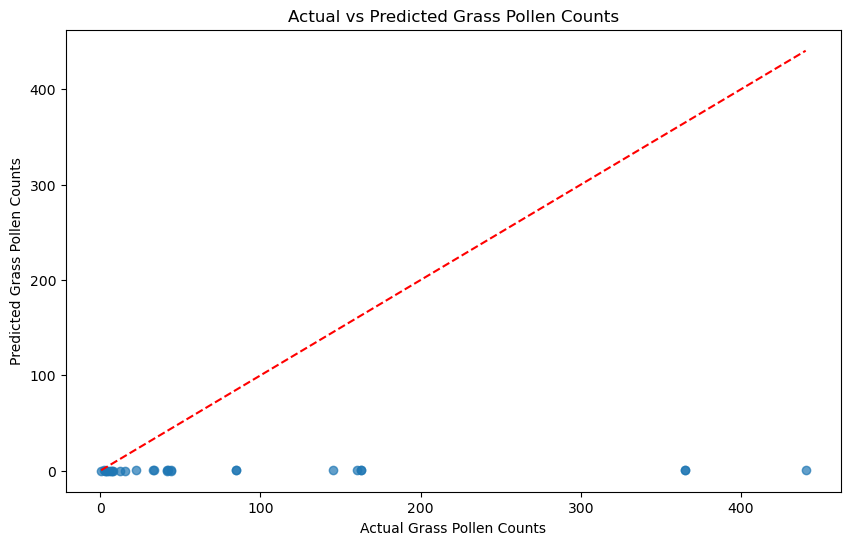

In [14]:
# Plot Actual vs Predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Grass Pollen Counts')
plt.ylabel('Predicted Grass Pollen Counts')
plt.title('Actual vs Predicted Grass Pollen Counts')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


This  plot of Actual vs. Predicted values shows that many points are near the X-axis and do not align with the red line, it suggests that my model needs significant improvement. Focus on refining the model, addressing data issues, and understanding the specific errors. Adjust expectations and use the model cautiously while exploring alternative solutions to achieve more accurate predictions.

Unsupervised Learning for Pattern Detection
Application:

Clustering Algorithms: Techniques like K-Means or DBSCAN can identify patterns in the data that might not be obvious, such as groupings of days with similar pollen counts and environmental conditions.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


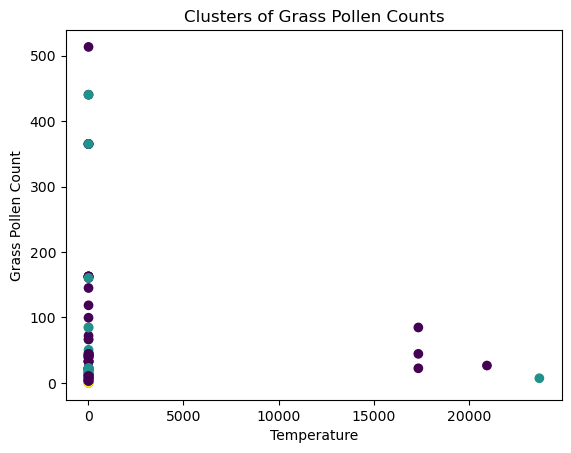

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster information to the data
data['Cluster'] = clusters

# Plot the clusters
plt.scatter(data['Temperature'], data['Grass pollen'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Grass Pollen Count')
plt.title('Clusters of Grass Pollen Counts')
plt.show()


Identify Patterns: Clustering helps identify days with similar conditions, which could be used to refine predictions or detect unusual events, such as a sudden spike in pollen counts.
How It Helps:

Understanding Spikes: By understanding what environmental conditions are associated with high pollen counts, the system can better anticipate and explain sudden increases in allergen levels, improving the accuracy of warnings.

 Deep Learning for Complex Environmental Interactions
Application:

Neural Networks: Deep learning models like neural networks can model complex, non-linear relationships between multiple environmental factors and pollen counts, potentially offering more accurate predictions.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


C:\Users\Francis Musoke\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Mean Squared Error (MSE): 14784.366834009503


Capture Complex Interactions: By modeling more complex interactions, deep learning can provide a nuanced understanding of how different environmental factors combine to affect pollen counts.
How It Helps:

Improved Predictions: Better modeling of complex relationships can improve the system’s predictions, particularly in scenarios where traditional models might struggle.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


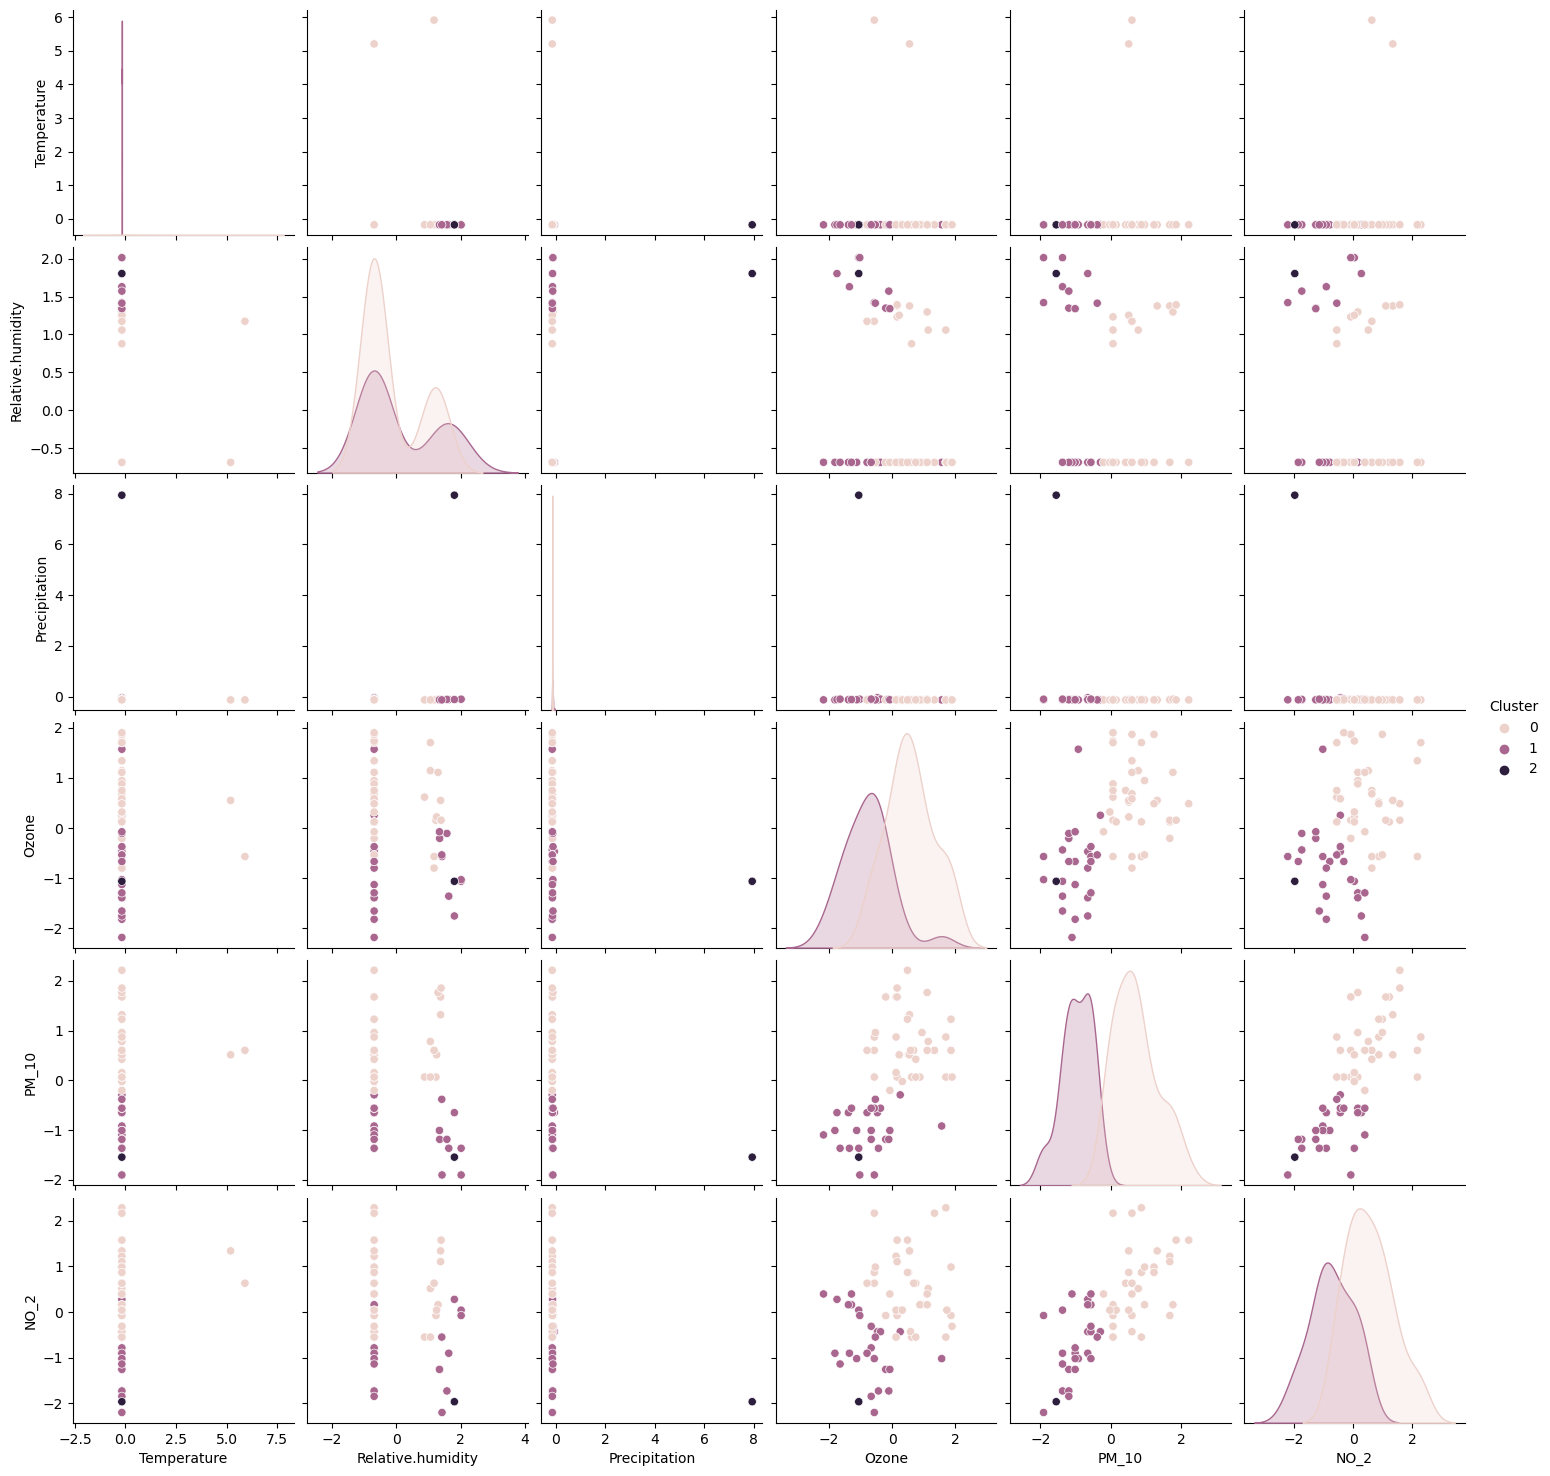

In [3]:
from sklearn.cluster import KMeans
import seaborn as sns

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# Add cluster labels to the dataset
X_train_clustered = pd.DataFrame(X_train_scaled, columns=features.columns)
X_train_clustered['Cluster'] = clusters

# Plotting clusters to visualize patterns
sns.pairplot(X_train_clustered, hue='Cluster', diag_kind='kde')
plt.show()


Step 4: Deep Learning for Complex Environmental Interactions
Here, we’ll create a basic neural network using TensorFlow and Keras to capture non-linear relationships.

C:\Users\Francis Musoke\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 12623.0996 - val_loss: 32735.3086
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11119.8730 - val_loss: 32671.5820
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7761.9521 - val_loss: 32609.8398
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15715.1797 - val_loss: 32538.9609
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11475.5049 - val_loss: 32466.9023
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12611.9668 - val_loss: 32383.0215
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12906.7891 - val_loss: 32287.3125
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9467.3066 - val_loss: 32179.2910
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15399.4902 - val_loss: 32046.8809
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12581.8125 - val_loss: 31906.7207
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7968.7339 - val_loss: 31756.3145
Epoch 12/5

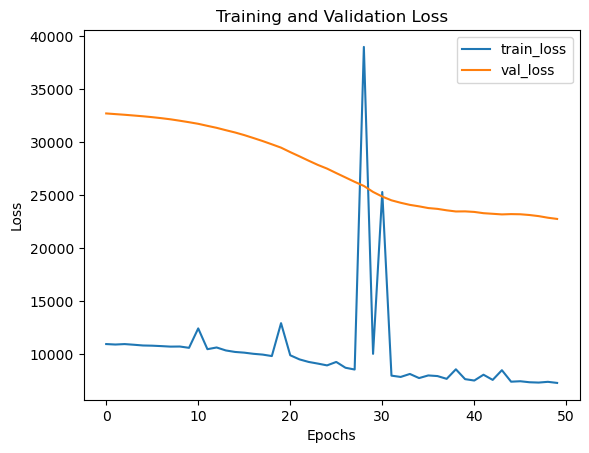

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=10)

# Evaluate the model
y_pred_nn = model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network MSE: {mse_nn}')
print(f'Neural Network R-squared: {r2_nn}')

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Step 5: Real-Time Alerts and Climate Resilience
In a real-world application, you could deploy the trained model to monitor live environmental data and trigger alerts when pollen counts are predicted to be high. 

In [5]:
# Assume we have new real-time data
real_time_data = np.array([[23, 60, 0, 20, 30, 40]])  # Example data

# Scale the data
real_time_data_scaled = scaler.transform(real_time_data)

# Predict grass pollen count
predicted_pollen_count = model.predict(real_time_data_scaled)
print(f'Predicted Grass Pollen Count: {predicted_pollen_count}')

# Set a threshold for high-risk periods
threshold = 100
if predicted_pollen_count > threshold:
    print("Alert: High grass pollen count expected! Take precautions.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Grass Pollen Count: [[73.0695]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


 Real-Time Alerts and Climate Resilience
Application:

Deploying the Model: Once the model is trained, it can be integrated into a real-time monitoring system that tracks environmental conditions and issues alerts when pollen counts are predicted to be high.
Implementation:

Example Workflow:
Data Collection: Continuously gather data from weather stations and pollution monitors.
Prediction: Use the trained AI model to predict pollen counts in real-time.
Alerting: If the predicted pollen count exceeds a certain threshold, automatically send alerts to users via an app or SMS.
Outcome:

Real-Time Protection: Users receive timely alerts, allowing them to take preventive measures like wearing masks or avoiding outdoor activities.
How It Helps:

Enhanced Resilience: By providing timely and accurate alerts, the system helps allergy sufferers better manage their exposure, reducing the impact of allergic reactions and improving quality of life.

In order to quantify model accuracy, several commonly used performance measures were used

Convert Continuous Target to Binary Classification
First, decide on a threshold to classify the pollen counts into two classes (e.g., high pollen and low pollen):

In [11]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Assuming your dataset is loaded into a DataFrame called 'data'

# Convert Grass pollen counts into binary labels (1 for high pollen, 0 for low pollen)
threshold = data['Grass pollen'].median()
data['High_Pollen'] = np.where(data['Grass pollen'] > threshold, 1, 0)

# Drop non-numeric columns (e.g., date columns)
non_numeric_cols = data.select_dtypes(include=['object', 'datetime']).columns
data = data.drop(columns=non_numeric_cols)

# Split the data into features and target
features = data.drop(columns=['Grass pollen', 'High_Pollen'])
target = data['High_Pollen']

# Ensure that all remaining data is numeric
features = features.apply(pd.to_numeric, errors='coerce')
features = features.fillna(0)  # Handle any remaining NaN values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a RandomForest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  1],
       [ 2, 15]], dtype=int64)

Extract and Interpret Confusion Matrix

In [12]:
# Extracting values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculating the metrics
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
ccr = (TP + TN) / (TP + TN + FP + FN)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"Correct Classification Rate (CCR): {ccr:.2f}")


Precision: 0.94
Recall: 0.88
F1-Score: 0.91
Correct Classification Rate (CCR): 0.89


a. Precision (0.94)
Definition: Precision measures the proportion of correctly predicted high pollen days out of all days the model predicted as high pollen.

Interpretation:

High Precision (94%) indicates that when the model predicts a high pollen day, it is correct 94% of the time.
Implications:
Few False Alarms: Users will rarely receive unnecessary warnings, maintaining trust and ensuring they take alerts seriously.
Reliability: The system is highly reliable in predicting high pollen events, reducing the likelihood of users taking unnecessary precautions.
b. Recall (0.88)
Definition: Recall measures the proportion of actual high pollen days that were correctly identified by the model.

Interpretation:

High Recall (88%) means that the model successfully identifies 88% of all actual high pollen days.
Implications:
Comprehensive Coverage: Most high-risk days are accurately flagged, providing users ample opportunity to prepare and mitigate allergy symptoms.
Missed Alerts: There is a 12% chance that a high pollen day may not be predicted (false negatives), indicating room for improvement to capture all high-risk instances.
c. F1-Score (0.91)
Definition: The F1-Score is the harmonic mean of precision and recall, providing a balance between the two.

Interpretation:

Strong F1-Score (91%) reflects a good balance between precision and recall.
Implications:
Overall Effectiveness: The model performs well in correctly identifying high pollen days while minimizing false alarms.
Balanced Performance: Indicates that neither precision nor recall is disproportionately low, ensuring consistent and reliable alerts.
d. Correct Classification Rate (CCR) (0.89)
Definition: CCR, or accuracy, measures the proportion of all correctly classified instances (both high and low pollen days) out of all predictions made.

Interpretation:

High CCR (89%) signifies that the model accurately predicts both high and low pollen days 89% of the time.
Implications:
Overall Accuracy: Users can trust the system's daily predictions, whether indicating high or low pollen levels.
System Reliability: Ensures consistent performance across varying conditions, enhancing user confidence in daily forecasts.